<a href="https://colab.research.google.com/github/Dua-Sharif/Machine-Learning/blob/main/AI_22303_(Lab_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [167]:
dataset = pd.read_csv('/content/Loan_dataset.csv')
dataset.head()

,person_age,person_gender,person_education,person_income,loan_amnt,loan_intent,loan_int_rate,cb_person_cred_hist_length,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948,35000,PERSONAL,16.02,3,No,1
1,21,female,High School,12282,1000,EDUCATION,11.14,2,Yes,0
2,25,female,High School,12438,5500,MEDICAL,12.87,3,No,1
3,23,female,Bachelor,79753,35000,MEDICAL,15.23,2,No,1
4,24,male,Master,66135,35000,MEDICAL,14.27,4,No,1


In [168]:
X = dataset[['person_age', 'person_income','loan_amnt',	'loan_int_rate'	,'cb_person_cred_hist_length']]
y = dataset['loan_status']

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [170]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [171]:
predictions = logistic.predict(X_test)

In [172]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89     10493
           1       0.68      0.34      0.45      3007

    accuracy                           0.82     13500
   macro avg       0.75      0.65      0.67     13500
weighted avg       0.80      0.82      0.79     13500



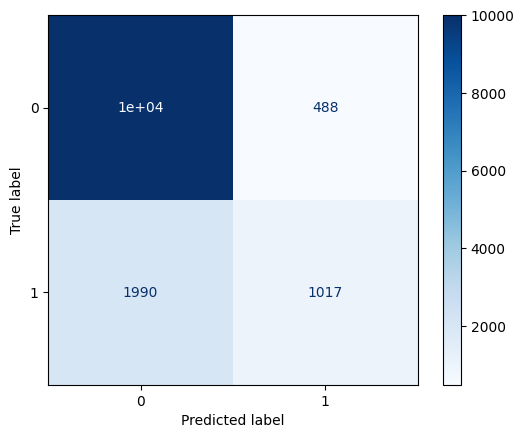

In [173]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()


In [174]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [175]:
def cost_func(X, Y, theta0, theta1):
    m = len(Y)
    cost = 0
    for i in range(m):
        prediction = sigmoid(theta0 + theta1 * X[i])
        cost += -Y[i] * np.log(prediction) - (1 - Y[i]) * np.log(1 - prediction)
    return cost / m


In [176]:
def grad_descent(X, Y, theta0, theta1, alpha, iterations):
    m = len(Y)

    for i in range(iterations):
        sum_theta0 = 0
        sum_theta1 = 0

        for j in range(m):
            prediction = sigmoid(theta0 + theta1 * X[j])
            error = prediction - Y[j]
            sum_theta0 += error
            sum_theta1 += error * X[j]

        theta0 -= (alpha / m) * sum_theta0
        theta1 -= (alpha / m) * sum_theta1

    return theta0, theta1


In [177]:
X = np.array([50000, 70000, 80000, 45000, 60000])  # Income
y = np.array([0, 1, 1, 0, 1])  # Loan approved (1) or not (0)

X = (X - np.mean(X)) / np.std(X)

In [178]:
theta0 = 0  # intercept
theta1 = 0  # slope
alpha = 0.01  # Learning rate
iterations = 1000
theta0, theta1 = grad_descent(X, y, theta0, theta1, alpha, iterations)

In [179]:
print("Optimized Theta0 (intercept):", theta0)
print("Optimized Theta1 (slope):", theta1)
print("Final Cost:", cost_func(X, y, theta0, theta1))

Optimized Theta0 (intercept): 0.5326890880563476
Optimized Theta1 (slope): 1.9106916544353776
Final Cost: 0.22536396111528148


In [180]:
predicted = (55000 - np.mean(X)) / np.std(X)
probability = sigmoid(theta0 + theta1 * predicted)
print("Loan Approval Probability:", probability)

Loan Approval Probability: 1.0


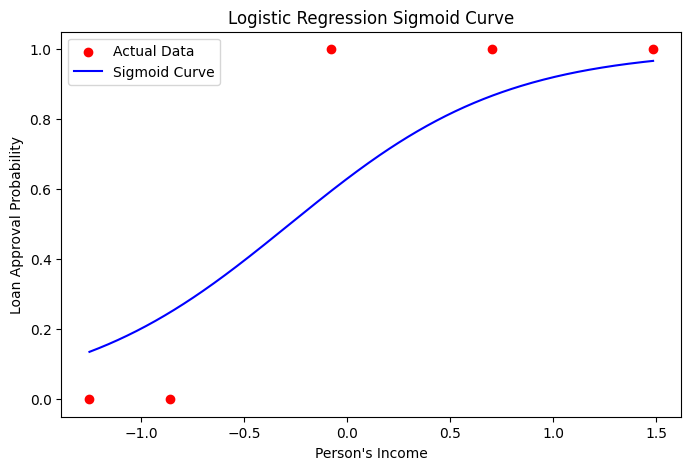

In [181]:
X_test = np.linspace(min(X), max(X), 300)
y_prob = sigmoid(theta0 + theta1 * X_test)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='red', label="Actual Data")
plt.plot(X_test, y_prob, label="Sigmoid Curve", color='blue')
plt.xlabel("Person's Income")
plt.ylabel("Loan Approval Probability")
plt.title("Logistic Regression Sigmoid Curve")
plt.legend()
plt.show()